<a href="https://colab.research.google.com/github/Nicoov21/data-mining/blob/main/2-tarea/dataMinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install pandas
#!pip install matplotlib
#!pip install missingno
#!pip install seaborn
#!pip install scipy

In [36]:
import os
import pandas as pd #!Libreria para interactuar con el archivo .csv, .xlsx, .json, etc.
import matplotlib.pyplot as plt #!Libreria para graficar
import missingno as msno #! Librería para visuarlizar valores faltantes
import seaborn as sns #!
from scipy.stats import skew, kurtosis

In [11]:
fileCSV = "customer_behavior.csv"
#? Se declara la ruta path del archivo
assert os.path.exists(fileCSV), f"No existe ese archivo"
#? Comprueba si existe el archivo, en caso de que no muestra el mensaje

In [12]:
df = pd.read_csv(fileCSV, sep=",")
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
#* Leemos el archico con read_csv()
#* a esta función le debemos dar la variable del archivo, y tambien
#* se pueden entregar más variables como:
# parse_dates=["nombrecolumnafecha"] para convertir a tipo fecha
# enconding="(latin1 o utf-8) para leer acentos o caracteres especiales",
# na_values=["NA","?","null"] considera estos valores como NaN

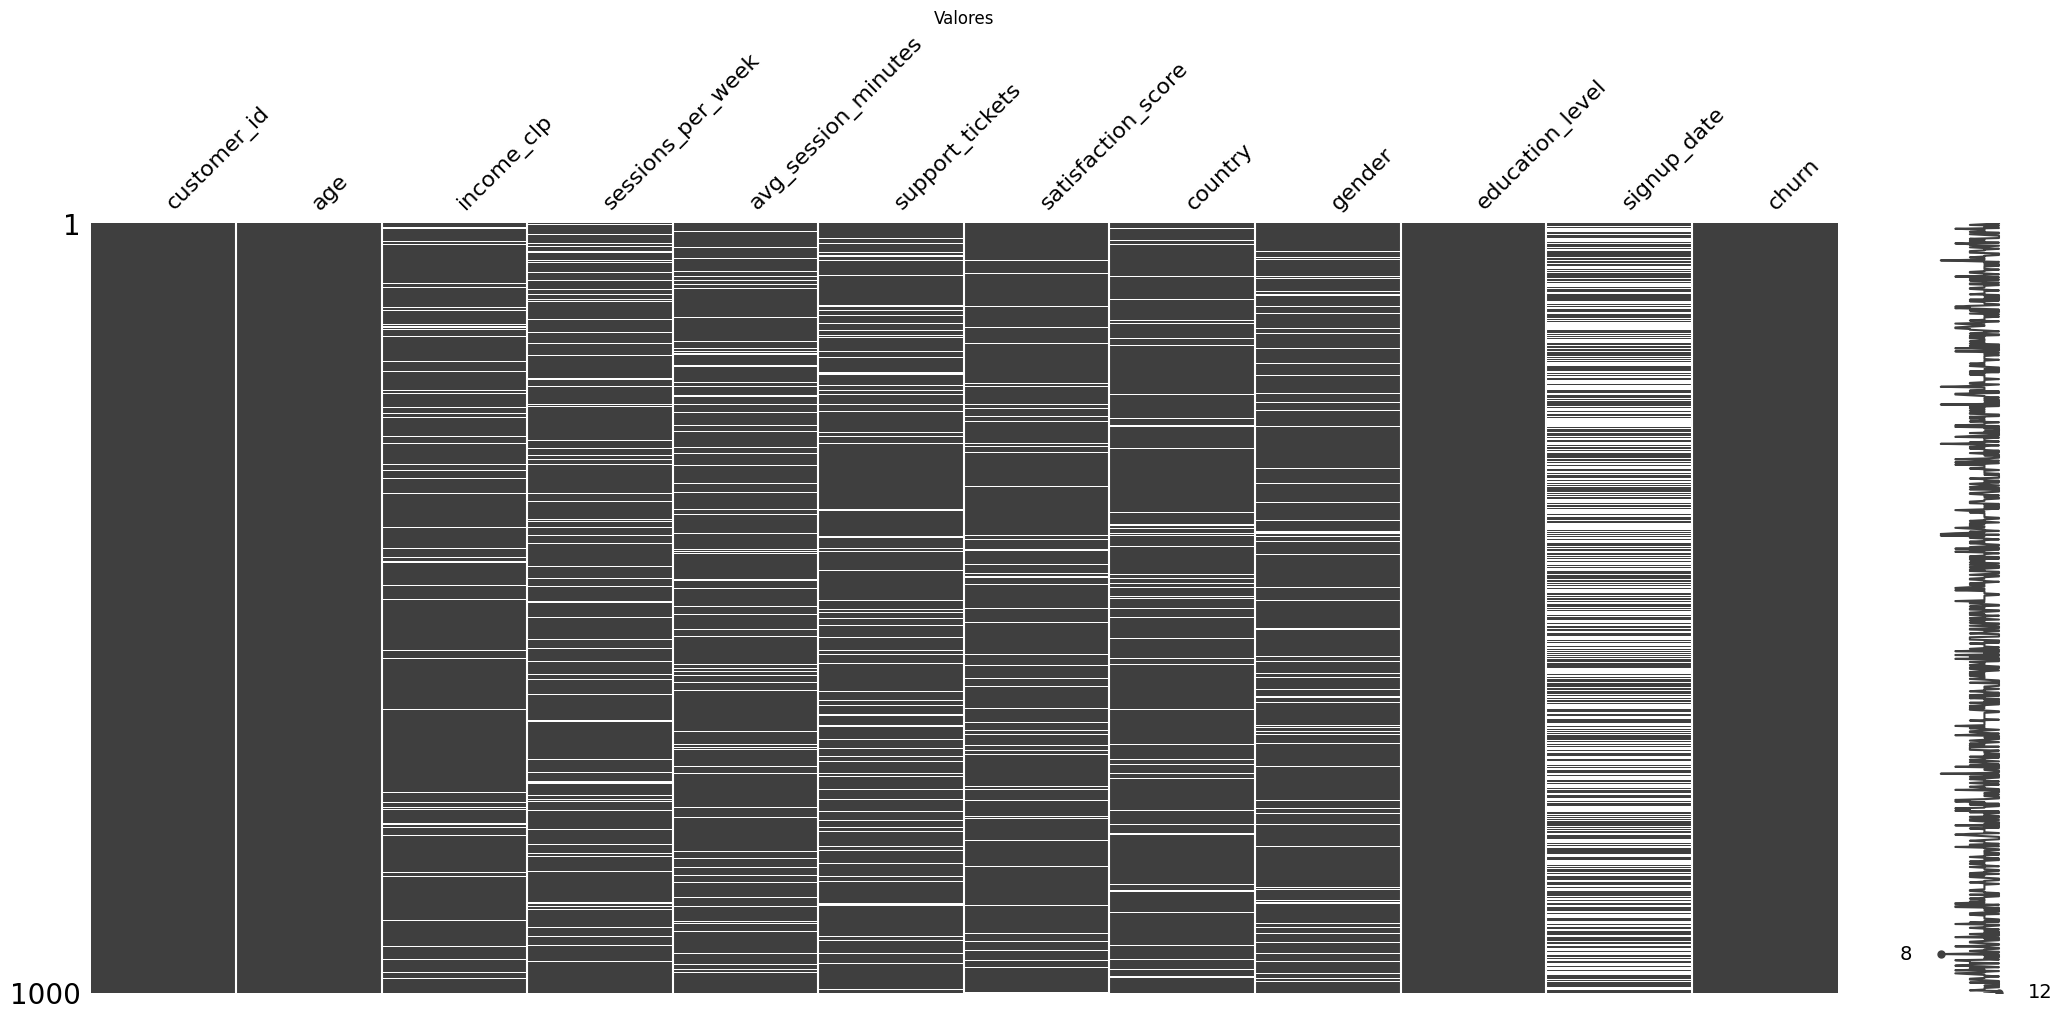

In [13]:
#* Missing values (with missingno)
msno.matrix(df) #! genera diagramas de barras verticales para cada columna
#? los valores no nulos se ven a color y los nulos se ven blancos
plt.title("Valores")
plt.show() #? esto muestra el grafico por pantalla, aunque sin este igual se puede ver

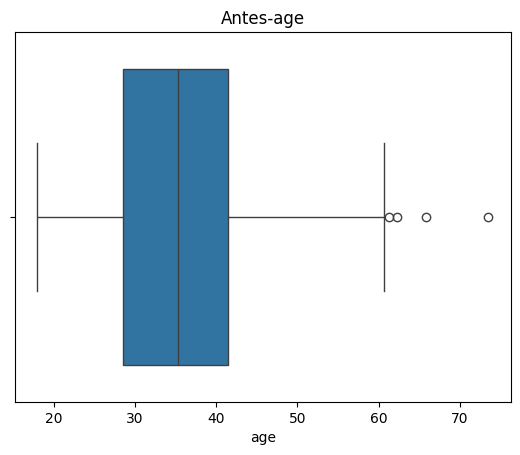

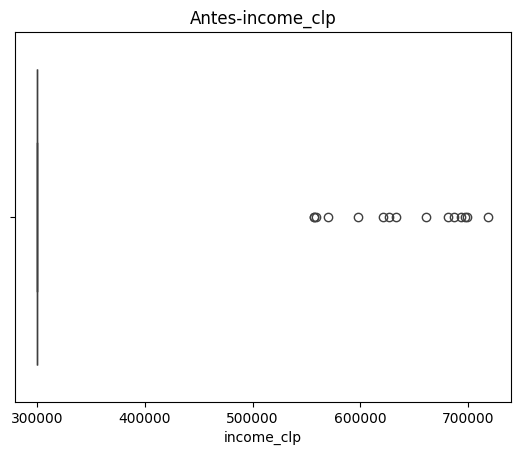

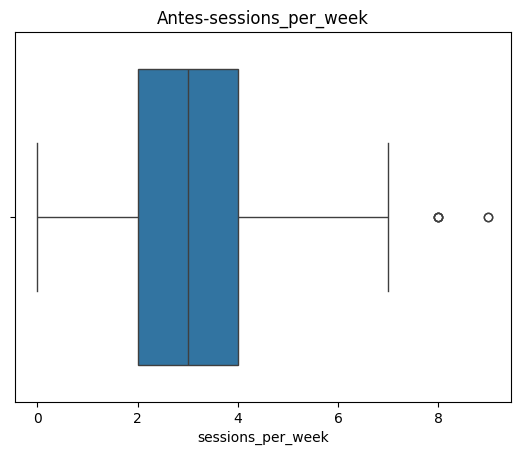

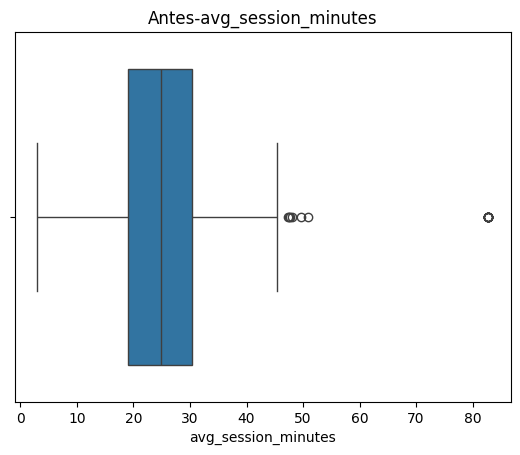

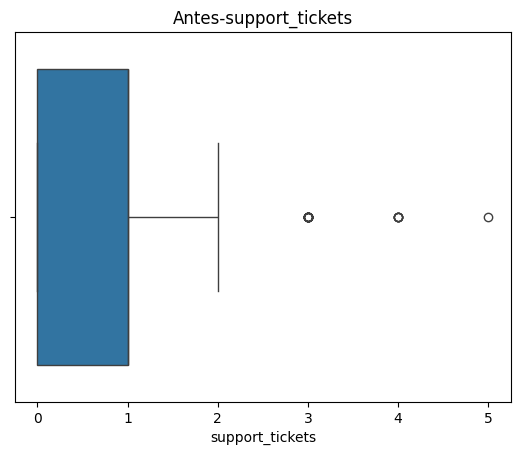

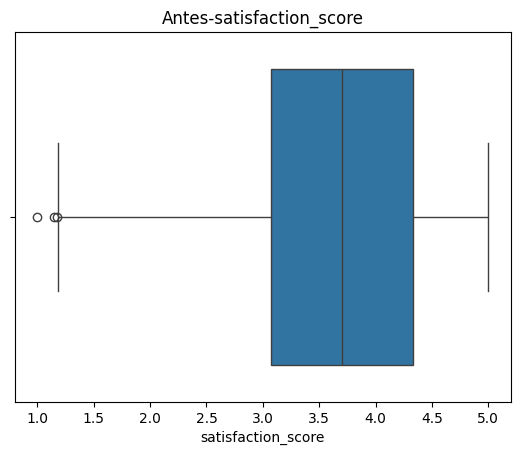

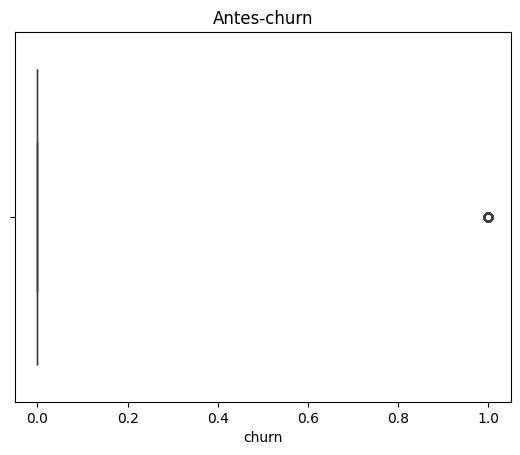

In [14]:
#Outlier removal (IQR) with before/after boxplots
#Antes
numCols = df.select_dtypes(include="number").columns.tolist()
#Seleccionamos los que sean de tipo númericos y los entregamos como una lista
numCols.remove('customer_id') # Excluimos customer_id, ya que por ahora no lo necesitamos

for col in numCols: # Recorremos las columnas númericas
    sns.boxplot(x=df[col]) # dibuja un boxplot de cada columna
    plt.title(f"Antes-{col}") # se muestra el antes de cada columna
    plt.show() #y se grafica

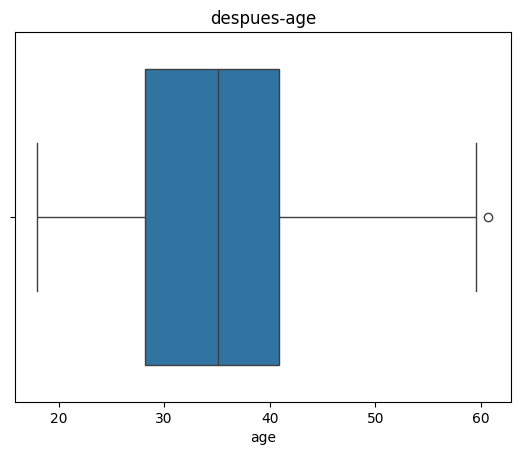

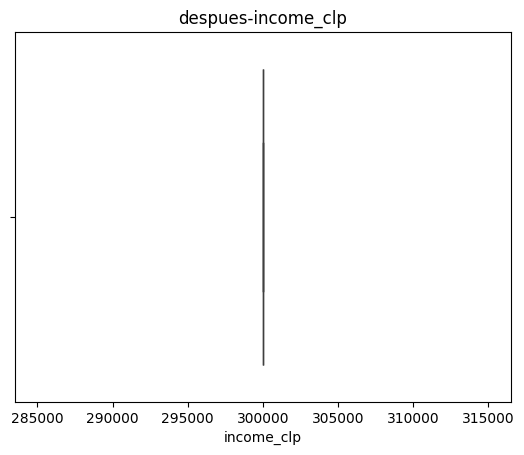

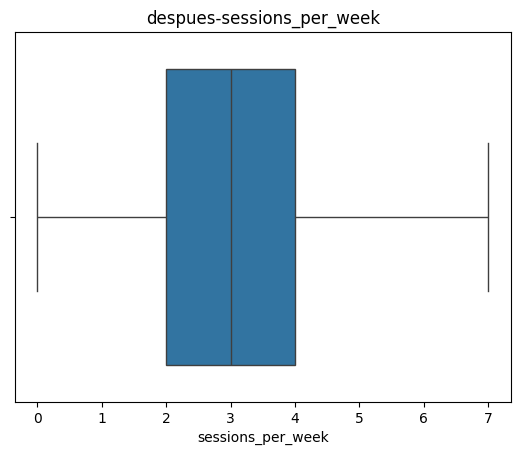

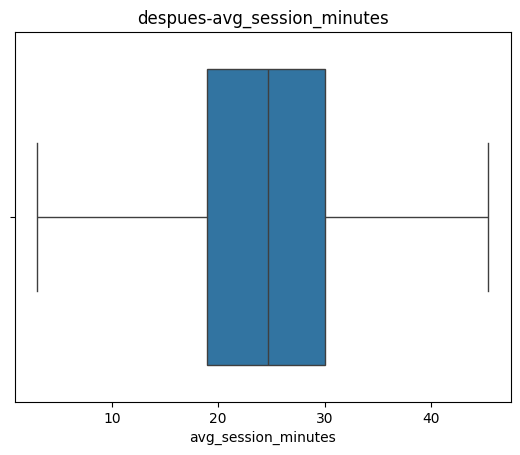

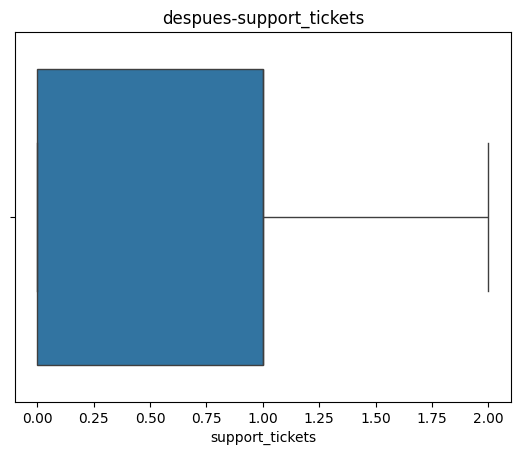

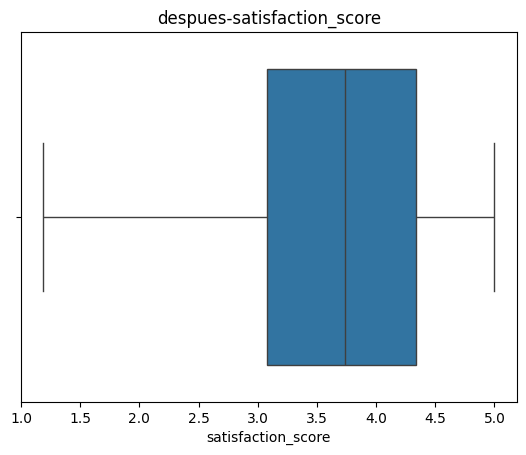

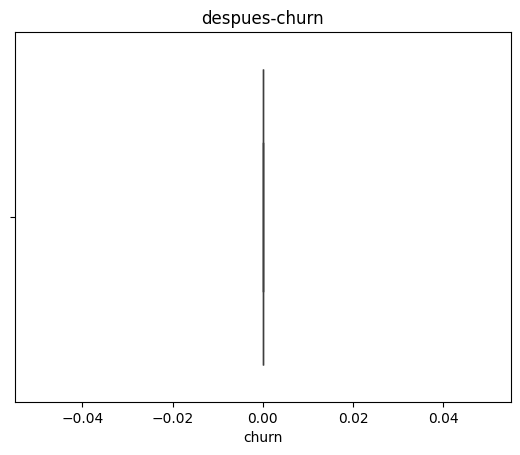

In [15]:
#Despues
sinOutliers = df.copy() #creamos una copia del DataFrame original

for col in numCols: # recorremos las columnas númericas
    Q1 = df[col].quantile(0.25) # Definimos el 25% de cada columna, o el rango quartil 1
    Q3 = df[col].quantile(0.75) # Definimos el 75% de cada columna, o el rango quartil 3
    IQR = Q3 - Q1 # Rango intercuartilico, donde están el 50% de los datos
    lower = Q1 - 1.5 * IQR # Definimos un limite inferior permitido
    upper = Q3 + 1.5 * IQR # definimos un limite superior permitido

    sinOutliers = sinOutliers[(sinOutliers[col] >= lower) & (sinOutliers[col] <= upper)]
    # obtenemos los datos que se encuentran dentro los rangos permitidos

for col in numCols:
  sns.boxplot(x=sinOutliers[col]) # dibuja un boxplot pero con los datos sin outliers
  plt.title(f"despues-{col}") # se muestra el despues de cada columna
  plt.show() #y se grafica

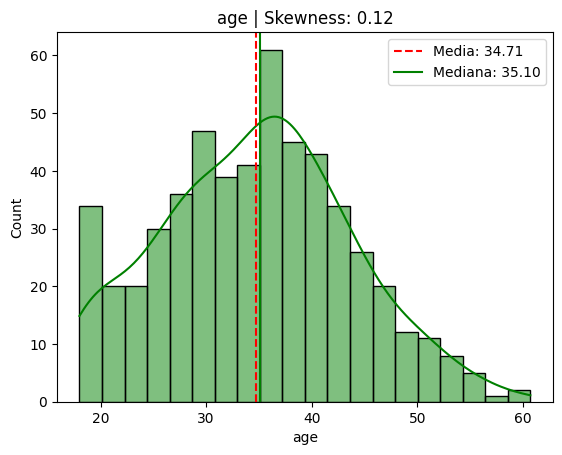

/tmp/ipython-input-3585826357.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewVal = skew(sinOutliers[col])


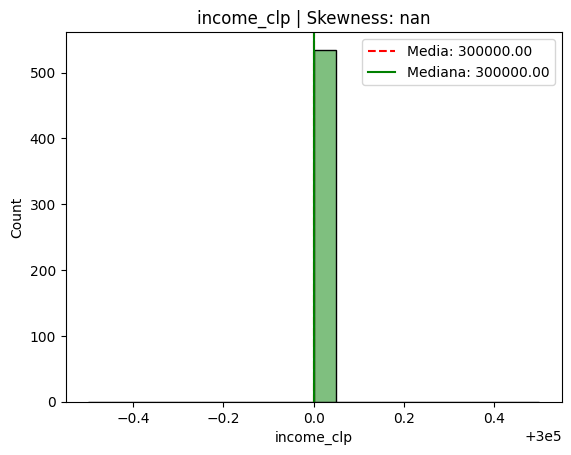

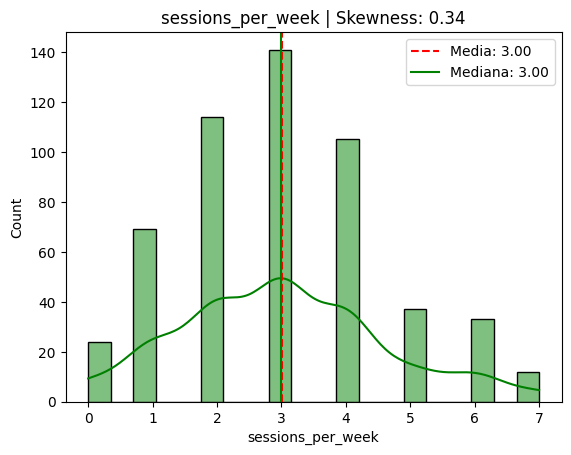

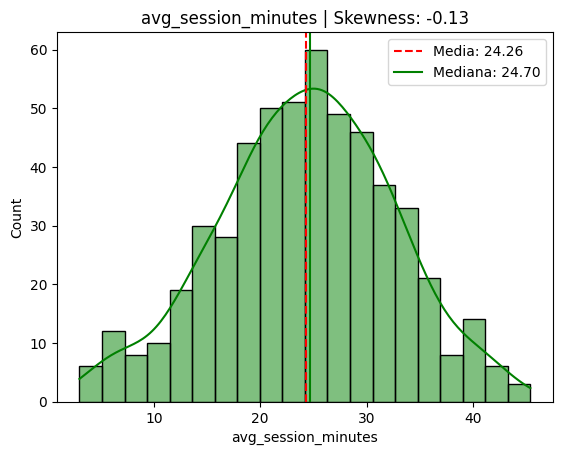

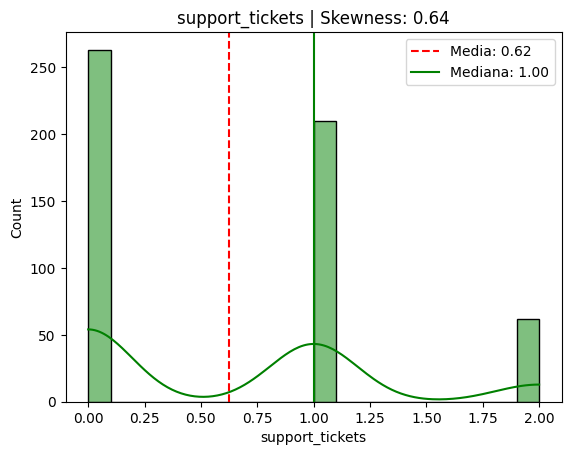

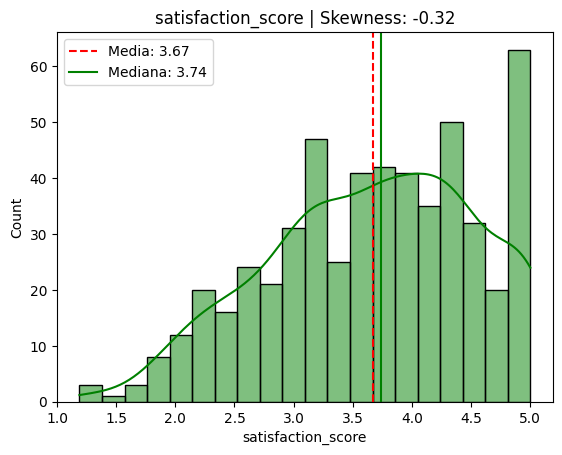

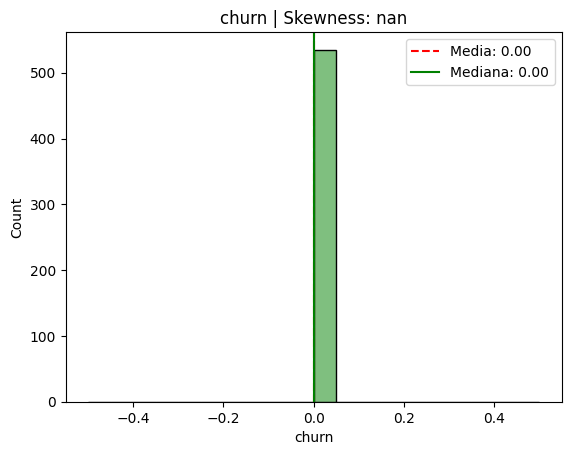

In [37]:
#Distribution plots with central tendency, skewness, kurtosis

for col in numCols:#Recorremos las columnas númericas
  #Tendencia central
  sns.histplot(sinOutliers[col], kde=True, bins=20, color='green')
  #Mostramos un histograma, kde es para la curva de densidad, bins es el numero de "cajones" o barras del histograma.
  media = sinOutliers[col].mean() #Obtenemos la media de los datos sin outliers
  mediana = sinOutliers[col].median() #Obtenemos la mediana de los datos sin outliers
  plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}') # Gráficamos una linea vertical de la media
  plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}') # y de la mediana

  skewVal = skew(sinOutliers[col])
  plt.title(f"{col} | Skewness: {skewVal:.2f}")

  #plt.title(f"Tendencia central - {col}") #Agregamos un titulo a cada gráfico
  plt.legend() # esto sirve para mostrar lo del label de axvline
  plt.show() # Lo mostramos
